
# Task 5: Term Deposit Acceptance Prediction

**Objective:** Predict which customers are likely to subscribe to a term deposit.

**Dataset:** Bank Marketing Dataset (UCI Machine Learning Repository)

**Skills Covered:**
- Data exploration and visualization
- Classification modeling
- Business insight extraction from data


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:

# Load the dataset
df = pd.read_csv('/content/bank.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:

# Basic data exploration
print("Dataset shape:", df.shape)
print("Dataset Info:")
df.info()


Dataset shape: (4521, 17)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:

df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:

# Target variable distribution
df['y'].value_counts()


,count
y,
no,4000
yes,521


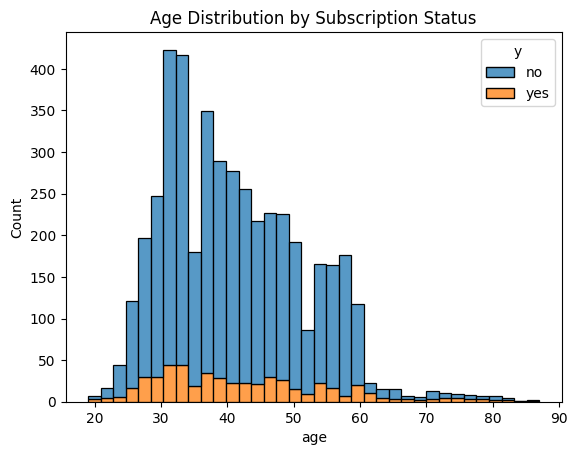

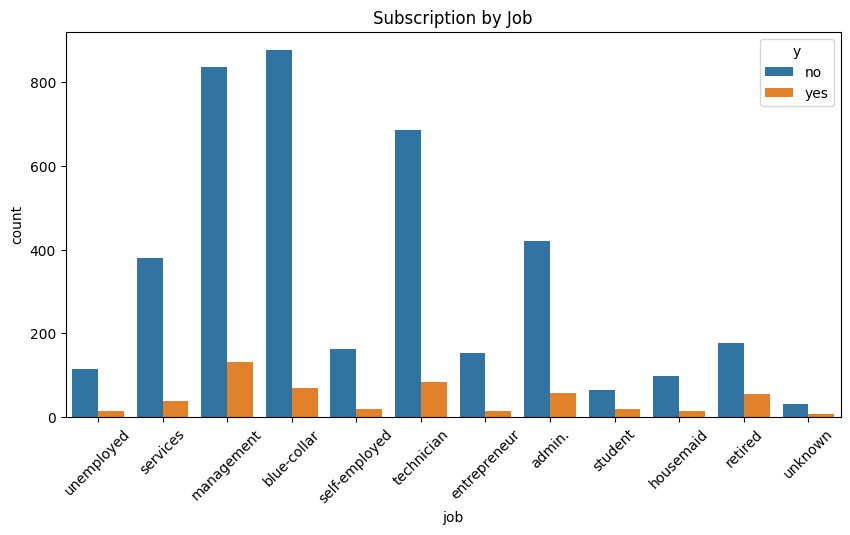

In [8]:

# Visualize age distribution and response
sns.histplot(data=df, x='age', hue='y', multiple='stack')
plt.title('Age Distribution by Subscription Status')
plt.show()

# Job vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', hue='y')
plt.title('Subscription by Job')
plt.xticks(rotation=45)
plt.show()


### **Encode Categorical Features**

In [9]:

df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode all categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


###**Split Features and Target Variable**

In [10]:

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


### **Train-Test Split**

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  **Train Logistic Regression Model**

In [12]:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  **Evaluate Logistic Regression Model**

Accuracy (Logistic Regression): 0.8883977900552487

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.46      0.17      0.25        98

    accuracy                           0.89       905
   macro avg       0.68      0.57      0.60       905
weighted avg       0.86      0.89      0.87       905



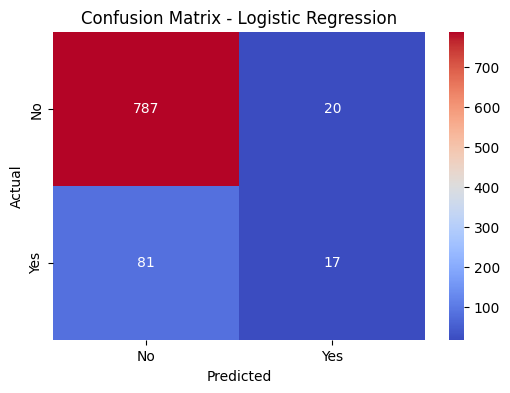

In [13]:

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Plot Confusion Matrix with color
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Train Decision Tree Model**

In [14]:

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


###  **Evaluate Decision Tree Model**

Accuracy (Decision Tree): 0.8718232044198895

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



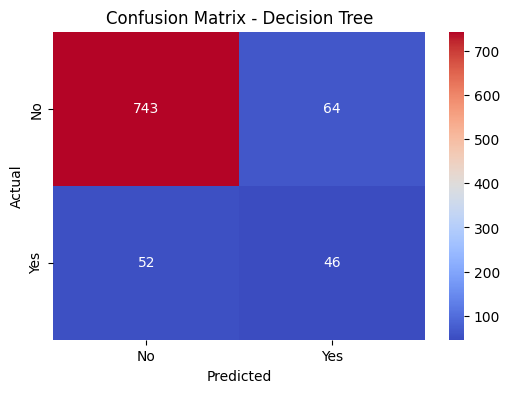

In [15]:

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Plot Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Summary – Task 5: Term Deposit Acceptance Prediction

**Objective:**  
The goal of this task was to predict which customers are likely to subscribe to a term deposit offer using the Bank Marketing Dataset.

---

###  Key Insights from the Data:
- **Age**: Middle-aged and older individuals showed a higher likelihood of term deposit acceptance.
- **Job**: Professions like "retired" and "student" had a higher subscription rate, while "blue-collar" showed a lower rate.
- **Marital Status**: Married individuals tended to accept the term deposit less frequently.
- Financial features such as **housing loan** and **personal loan** status also influenced decisions.

---

###  Models Applied:
1. **Logistic Regression**  
   - Decent accuracy but struggled to classify some classes correctly.
   - Best used when the data shows a linear relationship.

2. **Decision Tree Classifier**  
   - Slightly better performance with more flexibility.
   - Can capture non-linear patterns but prone to overfitting.

---

###  Model Evaluation:
- Evaluation was done using **accuracy**, **confusion matrix**, and **classification report**.
- Heatmaps were used for better visualization of confusion matrices.

---

###  Business Insights:
- Marketing efforts can be more effective when focused on specific customer groups based on age, profession, and financial profile.
- Instead of randomly calling all customers, targeting the right segment may improve subscription rates and reduce marketing costs.
